<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이상치 확인 및 정제

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0 : 'class_0', 1 : 'class_1', 2 : 'class_2'})

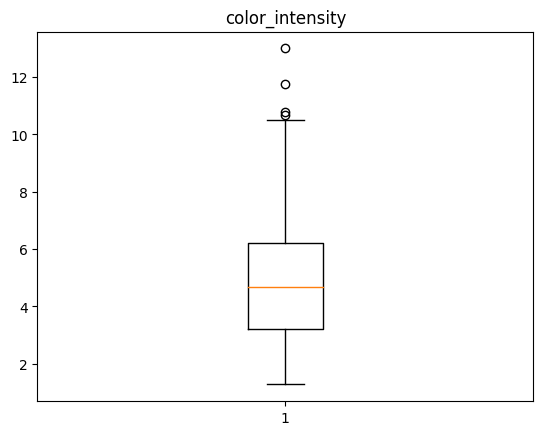

In [50]:
plt.boxplot(wine['color_intensity'], whis = 1.5)
                                  #  whis = whisker를 설정 1.5가 기본값
plt.title('color_intensity')
plt.show()

In [51]:
import numpy as np
def outliers_iqr(dt, col) :
  quartile_1, quartile_3 = np.percentile(dt[col], [25,75])
  iqr = quartile_3 - quartile_1
  lower_whis = quartile_1 - (iqr * 1.5)
  upper_whis = quartile_3 + (iqr * 1.5)
  outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
  return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [52]:
# 데이터 유형에 따라 whis 조정 필요

In [53]:
drop_outliers = wine.drop(index = outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [54]:
# 이상치 NaN으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN

# NaN이 된 이상치를 평균값으로 변경
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

## 범주형 변수처리

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0 : 'Setosa', 1 : 'Versicolour', 2 : 'Virginica'})

In [56]:
iris_dummy = pd.get_dummies(iris, columns = ['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 데이터 분할

In [57]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0 : 'Setosa', 1 : 'Versicolour', 2 : 'Virginica'})

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'),
                                                    iris['Class'],
                                                    test_size = 0.2,
                                                    random_state = 1004)

print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [59]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0


In [60]:
y_train.head(3)

87     Versicolour
67     Versicolour
131      Virginica
Name: Class, dtype: object

In [61]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [62]:
y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: Class, dtype: int64

In [63]:
''' 이 경우에는 비율이 원본데이터와 유사하게 나와서 문제가 발생하지 않겠지만
무작위 임의추출의 경우 결과가 원본을 충분히 반영하지 못할 경우
분석 성능에 큰 악영향을 끼침.
-> train_test_split()의 stratify 인자로 층화임의추출 여부 결정'''

' 이 경우에는 비율이 원본데이터와 유사하게 나와서 문제가 발생하지 않겠지만\n무작위 임의추출의 경우 결과가 원본을 충분히 반영하지 못할 경우\n분석 성능에 큰 악영향을 끼침.\n-> train_test_split()의 stratify 인자로 층화임의추출 여부 결정'

In [64]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'),
                                                    iris['Class'],
                                                    test_size = 0.2,
                                                    stratify = iris['Class'])

print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [65]:
y_train.value_counts()

Virginica      40
Versicolour    40
Setosa         40
Name: Class, dtype: int64

## 데이터 스케일링

In [66]:
'''
스케일링 - 표준화, 정규화
- 표준화 : 각 컬럼의 평균을 0, 분산은 1인 정규분포로 만드는 방법
- 정규화 : 각 칼럼들의 값이 특정 범위 (주로 0~1) 안에 들어가도록 만드는 방법
'''

'\n스케일링 - 표준화, 정규화\n- 표준화 : 각 컬럼의 평균을 0, 분산은 1인 정규분포로 만드는 방법\n- 정규화 : 각 칼럼들의 값이 특정 범위 (주로 0~1) 안에 들어가도록 만드는 방법\n'

In [67]:
# Standard Scaler 이상치에 민감 -> 확인 미 정제 후 사용, 회귀 < 분류
from sklearn.preprocessing import StandardScaler # 1) Scaler 선택 및 import
StdScaler = StandardScaler() # 2) Scaler 객체 생성

# train 데이터의 fitting과 스케일링
StdScaler.fit(X_train) # fit 3) train 데이터의 분포 저장
X_train_sc = StdScaler.transform(X_train) # 4) 스케일링

# test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(),
                                                X_train_sc.max(),
                                                X_train_sc.mean(),
                                                X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(),
                                               X_test_sc.max(),
                                               X_test_sc.mean(),
                                               X_test_sc.std()))

# Scaler.inverse_transform(X_train_sc) 5) 원래 스케일로 변환

		(min, max) (mean, std)
Train_scaled (-2.09, 3.18) (-0.00, 1.00)
Test_scaled (-2.57, 2.46) (-0.12, 1.00)


In [68]:
# Min-max Scaler 이상치에 민감 -> 확인 미 정제 후 사용, 회귀 > 분류
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max), (mean, std)")
print("Train_scaled (%.2f, %.2f), (%.2f, %.2f)"%(X_train_sc.min(),
                                                 X_train_sc.max(),
                                                 X_train_sc.mean(),
                                                 X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(),
                                               X_test_sc.max(),
                                               X_test_sc.mean(),
                                               X_test_sc.std()))

		(min, max), (mean, std)
Train_scaled (0.00, 1.00), (0.44, 0.27)
Test_scaled (-0.09, 1.00) (0.41, 0.26)


In [69]:
# Max Abs Scaler -1~1, 이상치에 매우 민감, 회귀 > 분류, 데이터가 양수인 경우 Min_Max와 동일
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# train
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# test
X_test_sc = MaScaler.transform(X_test)

# 결과
print("\t\t (min, max), (mean, std)")
print("Train_scaled (%.3f, %.3f) (%.3f, %.3f)"%(X_train_sc.min(),
                                                X_train_sc.max(),
                                                X_train_sc.mean(),
                                                X_train_sc.std()))
print("Test_scaled (%.3f, %.3f) (%.3f, %.3f)"%(X_test_sc.min(),
                                                X_test_sc.max(),
                                                X_test_sc.mean(),
                                                X_test_sc.std()))


		 (min, max), (mean, std)
Train_scaled (0.040, 1.000) (0.618, 0.237)
Test_scaled (0.040, 1.000) (0.600, 0.231)


In [70]:
# Robust Scaler 중앙값과 사분위 값 활용, 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화,
# quantile_range 파라미터를 조정하여 더 넓거나 좁은 범위의 값을 이상치로 설정하여 정제할 수 있다.
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

# train
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# test
X_test_sc = RuScaler.transform(X_test)

# 결과
print("\t\t (min, max), (mean, std)")
print("Train_scaled (%.2f, %.2f), (%.2f, %.2f)"%(X_train_sc.min(),
                                                 X_train_sc.max(),
                                                 X_train_sc.mean(),
                                                 X_train_sc.std()))
print("Train_scaled (%.2f, %.2f), (%.2f, %.2f)"%(X_test_sc.min(),
                                                 X_test_sc.max(),
                                                 X_test_sc.mean(),
                                                 X_test_sc.std()))

		 (min, max), (mean, std)
Train_scaled (-1.33, 2.33), (-0.01, 0.62)
Train_scaled (-1.67, 1.83), (-0.09, 0.62)


In [71]:
# 스케일링된 데이터 확인
pd.DataFrame(X_train_sc).head()

,0,1,2,3
0,0.244898,-0.666667,0.340426,0.066667
1,-0.734694,-1.000000,-0.312057,-0.200000
2,-1.142857,0.333333,-0.879433,-0.733333
3,-0.081633,-0.333333,0.028369,0.000000
4,0.408163,-0.500000,0.141844,0.333333


In [72]:
# 원본 스케일로 변경
X_Original = RuScaler.inverse_transform(X_train_sc)

pd.DataFrame(X_Original).head()

,0,1,2,3
0,6.1,2.6,5.6,1.4
1,4.9,2.4,3.3,1.0
2,4.4,3.2,1.3,0.2
3,5.7,2.8,4.5,1.3
4,6.3,2.7,4.9,1.8


## 차원 축소

차원이 크다고 무조건 차원의 저주를 발생시키는 것은 아님.  
자료의 크기가 충분히 클 때의 변수의 증가는 자료를 더 정밀하게 설명할 수 있는 수단이 된다.

1. 설명변수 선택 - 가장 간단함. 하지만 설명변수 간의 고차원저인 상관관계는 고려하기 어려움.  


2. 주성분 분석 - 가장 많이 사용됨. 기존의 칼럼을 새롭게 해석하여 저차원의 초평면에 투영하는 것. 여러 변수 간에 존재하는 상관관계를 이용하여 데이터를 축에 사영했을 때 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정하는 방법.  
  - 가장 큰 분산을 기반으로 첫 번쨰 축 생성  
  - 이 벡터 축에 직각이 되는 벡터를 두 번째 축으로 선택  
  - 다시 두 번째 축과 직각이 되는 벡터를 세 번째 축으로 설정  
  - 이렇게 데이터를 충분히 설명할 수 있는 몇 개의 주성분으로 압축

In [73]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0 : 'Setosa',
                                   1 : 'Versicolour',
                                   2 : 'Virginica'})

In [74]:
# ① 전처리
# 수치형 데이터만 추출
features = ['수치형 변수1', '수치형 변수2']
x = iris.drop(columns = 'Class')

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [75]:
# ② 주성분 추출
from sklearn.decomposition import PCA

pca = PCA(n_components = 4) # 생성할 주성분의 개수
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력 : ", pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력 :  [0.72962445 0.22850762 0.03668922 0.00517871]


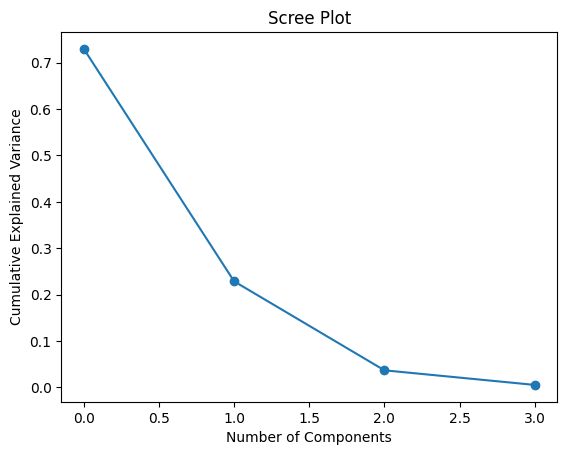

In [76]:
# ③ Scree Plot으로 사용할 주성분의 개수 정하기
# Scree Plot은 주성분 각각으로 설명할 수 있는 분산의 정도를 점으로 표시하고 각 점들을 이은 선
# 주성분의 개수가 증가할수록 Scree Plot의 기울기 감소.
# 보통 플롯의 기울기가 급격히 감소하는 지점의 직전가지 주성분으로 선택.

import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-') # 형태지정
plt.show()

선 스타일:  


'-': Solid line (기본값)  
'--': Dashed line  
':': Dotted line  
'-.': Dash-dot line  


마커 스타일:  

'o': Circle marker (기본값)  
's': Square marker  
'^': Triangle marker  
'd': Diamond marker  
'x': X marker  
'.': Point marker  
,: Pixel marker  

In [77]:
# ④ 새로운 데이터프레임 확인
# 주성분의 수를 정하고 ②를 다시 수행하여 주성분 객체를 생성하고, fit_transform() 수행
# 원하는 개수의 주성분을 가진 데이터프레임 생성

# PCA 객체 생성 (주성분 개수 2개 생성)
pca = PCA(n_components = 2)

# 2개의 주성분을 가진 데이터로 변환
principalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principalComponents,
                              columns = ['pc1', 'pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


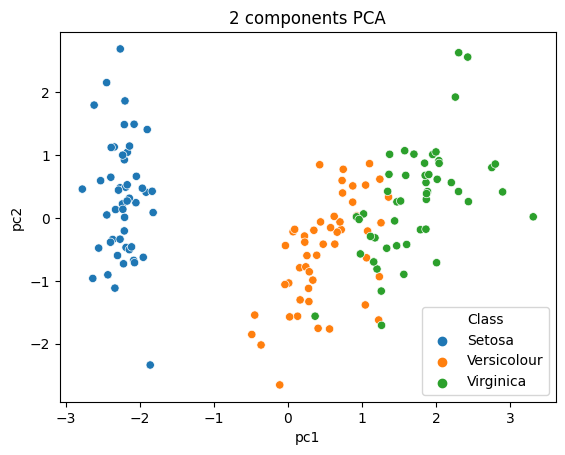

In [78]:
# ⑤ 주성분 산포도 확인
# 주성분 데이터프레임으로 산포도를 그리면 종속변수를 더 잘 설명하는 산포도를 확인할 수 있음.
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 components PCA')
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris.Class, data = principal_iris)
# hue = iris.Class는 데이터 포인트의 색상을 'iris' 데이터프레임의 'Class' 컬럼에 따라 다르게 표시
plt.show()

## 데이터 불균형 처리

In [79]:
# 오버 샘플링 - 소수의 비정상 데이터의 수를 늘림
# 언더 샘플링 - 상대적으로 많은 정상 데이터에서 일부만 사용

In [80]:
# 언더 샘플링
# 데이터 불균형으로 인한 문제는 피할 수 있지만 전체 데이터의 수가 줄어들어 학습 성능을 떨어뜨리는 결과를 초래할 수 있음.

!pip install imbalanced-learn

In [81]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter # 리스트나 배열 등의 데이터에서 각 요소의 개수를 계산
from imblearn.under_sampling import RandomUnderSampler # 언더샘플링을 수행

x, y = make_classification(n_samples = 2000, n_features = 6, weights = [0.95], flip_y = 0)
# n_samples는 생성할 데이터 샘플)의 수, n_features는 각 샘플의 특성 수, weights=[0.95]는 클래스의 가중치를 설정

print(Counter(y))

Counter({0: 1900, 1: 100})


In [82]:
# Random Under Sampling
# 다수를 차지하는 레이블에서 무작위로 데이터를 제거
# sampling strategy 파라미터를 majority로 지정하면 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 줄임.
# 0~1을 지정하면 소수 테이블의 데이터 수와 다수 레이블의 데이터 수가 해당 비율이 되도록 조정
undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = undersample.fit_resample(x, y)

print(Counter(y_under))

Counter({0: 100, 1: 100})


In [83]:
undersample = RandomUnderSampler(sampling_strategy = 0.5)
x_under2, y_under2 = undersample.fit_resample(x, y)

print(Counter(y_under))

Counter({0: 100, 1: 100})


In [84]:
# 오버샘플링
# 소수의 레이블을 지닌 데이터세트를 증식시켜 학습하는 방법으로 데이터의 손실이없어 일반적으로 성능이 유리함.
# 데이터를 단순 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있음.
# 오버피팅의 위험성이 있지만 불균형 문제를 처리하지 않는 것보다는 유효하기 때문에 종종 사용됨.

# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 0.5)
x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [85]:
oversample = RandomOverSampler(sampling_strategy = 'minority')
x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 1900, 1: 1900})


In [86]:
# SMOTE(Synthetic Minority Over-sampling Technique)
# 소수레이블을지는 데이터 세트의 관착 값에 대한 K개의 최근첩 이웃(KNN)을 찾고, 관측 값과 이웃으로 선택죈 값 사이에 임의의 새로운 데이터를 생성하는 방법

from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)

print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


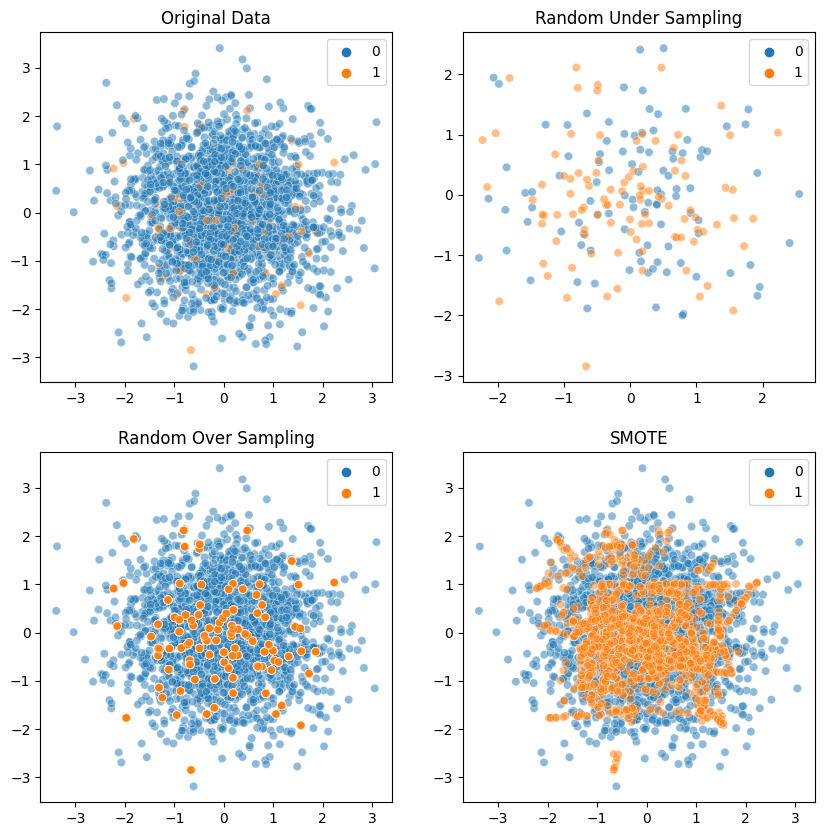

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

sns.scatterplot(x = x[:, 1], y = x[:, 2], hue = y, ax = axes[0][0], alpha = 0.5)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], hue = y_under, ax = axes[0][1], alpha = 0.5)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue = y_over, ax = axes[1][0], alpha = 0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue = y_sm, ax = axes[1][1], alpha = 0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()

In [87]:
# Random Over Sampling은 데이터를 단순 복제하여 1번 레이블의 관측값들의 위치가 원본 데이터와 차이가 없음.
# SMOTE는 원본 데이터와 다른 1번 레이블 테이터를 만들어냄.